In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math 
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =====================  PLANO ===================== 

Haz incidiendo sobre la cara plana desde el aire:
Alinear la parte plana del prisma cilíndrico con uno de los diámetros del disco
graduado. Colocar el disco graduado de manera que el cero coincida con el haz incidente.
Girar cinco grados en cualquier dirección, esto es θi. Anótese la posición donde está el haz reflejado (θr) y transmitido (θt). Repetir para incrementos de cinco grados, hasta 90 grados de incidencia.

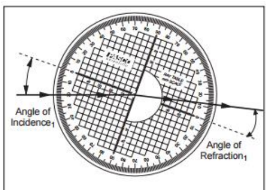

In [ ]:
incidentes1 = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, ])
refraccion1 = np.array([0, 3, 6, 10.05, 14, 17, 20, 23.5, 26, 29, 32, 34, 37, 38, 41, 42, 43, 44])

senIncidentes1 = np.sin(np.deg2rad(incidentes1))
senRefraccion1 = np.sin(np.deg2rad(refraccion1))

In [ ]:
df1 = pd.DataFrame({'incidentes': incidentes1, 'refraccion': refraccion1, 'senIncidentes': senIncidentes1, 'senRefraccion': senRefraccion1})

In [ ]:
df1

,incidentes,refraccion,senIncidentes,senRefraccion
0,0,0.00,0.000000,0.000000
1,5,3.00,0.087156,0.052336
2,10,6.00,0.173648,0.104528
3,15,10.05,0.258819,0.174508
4,20,14.00,0.342020,0.241922
5,25,17.00,0.422618,0.292372
6,30,20.00,0.500000,0.342020
7,35,23.50,0.573576,0.398749
8,40,26.00,0.642788,0.438371
9,45,29.00,0.707107,0.484810


## <b>GRAFICAS I.</b> 
Para cada tabla, hagan una gráfica de los valores del ángulo de incidencia (abcisa) y ángulo de transmisión (ordenada). Discutan su forma. ¿Es lineal? Hagan una gráfica con los valores del seno del ángulo de incidencia (abcisa) y el seno del ángulo de transmisión (ordenada). Discutan su forma. ¿Es lineal?

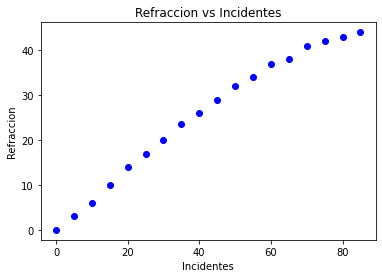

In [ ]:
# Graficar los datos

#### ES UNA PARTE DE FUNCION SENO
plt.plot(df1['incidentes'], df1['refraccion'], 'bo')
plt.xlabel('Incidentes')
plt.ylabel('Refraccion')
plt.title('Refraccion vs Incidentes')
plt.show()

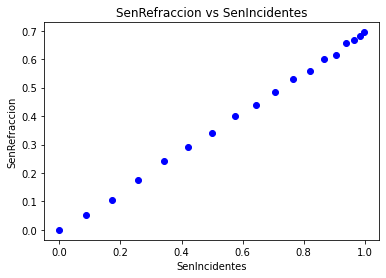

In [ ]:
#CON SENOS
plt.plot(df1['senIncidentes'], df1['senRefraccion'], 'bo')
plt.xlabel('SenIncidentes')
plt.ylabel('SenRefraccion')
plt.title('SenRefraccion vs SenIncidentes')
plt.show()

In [ ]:
#Realizar el ajuste lineal y mostrar los resultados
L_slope, L_intercept, L_r_value, L_p_value, L_std_err = linregress(df1['senIncidentes'], df1['senRefraccion'])

print('Pendiente:', L_slope)
print('Intersección:', L_intercept)
print('Coeficiente de correlación:', L_r_value)
print('Valor p:', L_p_value)
print('Error estándar:', L_std_err)

Pendiente: 0.6979242851626123
Intersección: -0.005863022604461476
Coeficiente de correlación: 0.9996976539427264
Valor p: 3.5072322143299896e-27
Error estándar: 0.004291547951888556


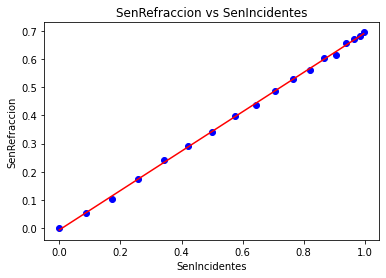

In [ ]:
#CON SENOS
plt.plot(df1['senIncidentes'], df1['senRefraccion'], 'bo')
plt.plot(df1['senIncidentes'], L_slope*df1['senIncidentes']+L_intercept, #y = mb + b
            'r-', label='Ajuste lineal')
plt.xlabel('SenIncidentes')
plt.ylabel('SenRefraccion')
plt.title('SenRefraccion vs SenIncidentes')
plt.show()

## [][][][] Obtener el índice de refracción del prisma por dos métodos:
###1) Sacando un promedio.

In [ ]:
n_aire = 1

df_n_vidrio = pd.Series(n_aire * df1['senIncidentes'] / df1['senRefraccion'])

df_n_vidrio

0          NaN
1     1.665313
2     1.661253
3     1.483140
4     1.413763
5     1.445483
6     1.461902
7     1.438440
8     1.466309
9     1.458525
10    1.445587
11    1.464883
12    1.439023
13    1.472088
14    1.432329
15    1.443553
16    1.444003
17    1.434079
dtype: float64

In [ ]:
n_vidrio_prom = df_n_vidrio.mean()

In [ ]:
print('(PROMEDIO) índice de refracción del prisma: ', n_vidrio_prom)

(PROMEDIO) índice de refracción del prisma:  1.4746865339414508


###2) Usando un ajuste por mínimos cuadrados. Relacionar la pendiente de la recta con el índice de refracción.

In [ ]:
n_vidrio_ajuste = 1 / L_slope # Sen(ref) = (n_aire / n_vidrio) Sen(inc)
print('(MINIMOS CUADRADOS) índice de refracción del prisma: ', n_vidrio_ajuste)

(MINIMOS CUADRADOS) índice de refracción del prisma:  1.4328201801532179


# ===================== CONVEXO =====================

Haz incidiendo sobre la cara plana desde el acrílico mismo:
Repetir el procedimiento anterior y llenar una tabla similar, pero ahora enviando el haz a la cara plana después de haber viajado radialmente a través del acrílico.

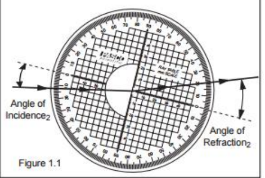

In [ ]:
incidentes2 = np.array([0, 5, 10,   15, 20,   25, 30, 35, 40])
refraccion2 = np.array([0, 7, 14.5, 22, 29.5, 38, 47, 58, 70 ])
#EXPERIMENTOa un angulo de 43.5 se encuentra el angulo de reflexion total interna. angulo critico = 43.5

senIncidentes2 = np.sin(np.deg2rad(incidentes2))
senRefraccion2 = np.sin(np.deg2rad(refraccion2))


In [ ]:
df2 = pd.DataFrame({'incidentes': incidentes2, 'refraccion': refraccion2, 'senIncidentes': senIncidentes2, 'senRefraccion': senRefraccion2})

In [ ]:
df2

,incidentes,refraccion,senIncidentes,senRefraccion
0,0,0.0,0.000000,0.000000
1,5,7.0,0.087156,0.121869
2,10,14.5,0.173648,0.250380
3,15,22.0,0.258819,0.374607
4,20,29.5,0.342020,0.492424
5,25,38.0,0.422618,0.615661
6,30,47.0,0.500000,0.731354
7,35,58.0,0.573576,0.848048
8,40,70.0,0.642788,0.939693


## <b>GRAFICAS II.</b> 
Para cada tabla, hagan una gráfica de los valores del ángulo de incidencia (abcisa) y ángulo de transmisión (ordenada). Discutan su forma. ¿Es lineal? Hagan una gráfica con los valores del seno del ángulo de incidencia (abcisa) y el seno del ángulo de transmisión (ordenada). Discutan su forma. ¿Es lineal?

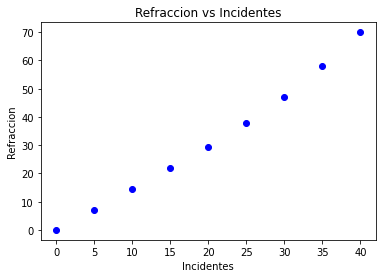

In [ ]:
# Graficar los datos

#### ES UNA PARTE DE FUNCION SENO
plt.plot(df2['incidentes'], df2['refraccion'], 'bo')
plt.xlabel('Incidentes')
plt.ylabel('Refraccion')
plt.title('Refraccion vs Incidentes')
plt.show()

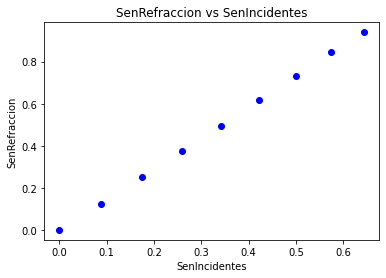

In [ ]:
#CON SENOS
plt.plot(df2['senIncidentes'], df2['senRefraccion'], 'bo')
plt.xlabel('SenIncidentes')
plt.ylabel('SenRefraccion')
plt.title('SenRefraccion vs SenIncidentes')
plt.show()

In [ ]:
#Realizar el ajuste lineal y mostrar los resultados
L_slope2, L_intercept2, L_r_value2, L_p_value2, L_std_err2 = linregress(df2['senIncidentes'], df2['senRefraccion'])

print('Pendiente:', L_slope2)
print('Intersección:', L_intercept2)
print('Coeficiente de correlación:', L_r_value2)
print('Valor p:', L_p_value2)
print('Error estándar:', L_std_err2)

Pendiente: 1.472869370529466
Intersección: -0.005054874856361191
Coeficiente de correlación: 0.9999145412148606
Valor p: 1.8995444632653598e-14
Error estándar: 0.007278408104028778


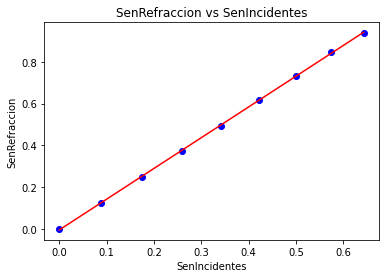

In [ ]:
#CON SENOS
plt.plot(df2['senIncidentes'], df2['senRefraccion'], 'bo')
plt.plot(df2['senIncidentes'], L_slope2*df2['senIncidentes']+L_intercept2, #y = mb + b
            'r-', label='Ajuste lineal')
plt.xlabel('SenIncidentes')
plt.ylabel('SenRefraccion')
plt.title('SenRefraccion vs SenIncidentes')
plt.show()

## [][][][] Obtener el índice de refracción del prisma por dos métodos:
###1) Sacando un promedio.

In [ ]:
n_aire = 1

df_n_vidrio2 = pd.Series(n_aire * df2['senIncidentes'] / df2['senRefraccion'])

df_n_vidrio

0          NaN
1     1.665313
2     1.661253
3     1.483140
4     1.413763
5     1.445483
6     1.461902
7     1.438440
8     1.466309
9     1.458525
10    1.445587
11    1.464883
12    1.439023
13    1.472088
14    1.432329
15    1.443553
16    1.444003
17    1.434079
dtype: float64

In [ ]:
n_vidrio_prom2 = 1 / df_n_vidrio2.mean() 

In [ ]:
print('(PROMEDIO) índice de refracción del prisma: ', n_vidrio_prom2)

(PROMEDIO) índice de refracción del prisma:  1.448050696250246


###2) Usando un ajuste por mínimos cuadrados. Relacionar la pendiente de la recta con el índice de refracción.

In [ ]:
n_vidrio_ajuste2 = L_slope2
print('(MINIMOS CUADRADOS) índice de refracción del prisma: ', n_vidrio_ajuste2)

(MINIMOS CUADRADOS) índice de refracción del prisma:  1.472869370529466
